In [63]:
import pymc3 as pm
import theano.tensor as T
import numpy as np
import arviz as az

In [64]:
C = np.array([21, 17, 21, 18, 22, 31, 31, 34, 34, 35, 35, 36, 39, 36, 35])
ID = np.array(list(range(15)))
Q = 40
ID

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [65]:
with pm.Model() as Emil: 
    
    # priors 
    zi = pm.Bernoulli("zi", 0.5, shape = len(ID)) # for each participant (shape?)
    ϕ = pm.Uniform("ϕ", lower = 0.5, upper = 1)
    ψ = 0.5
    
    # deterministic?
    θ = pm.Deterministic("θ", T.eq(zi, 1) * ϕ + ψ * T.eq(zi, 0)) #great. 
    
    # likelihood 
    ki = pm.Binomial("ki", p = θ, n = Q, observed = C) #Again: theta for each participant?
    

In [66]:
with Emil: 
    trace_Rønnn = pm.sample(2000)

c:\users\95\anaconda3\envs\cogmod\lib\site-packages\pymc3\sampling.py:465: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  warnings.warn(
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>BinaryGibbsMetropolis: [zi]
>NUTS: [ϕ]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 40 seconds.
c:\users\95\anaconda3\envs\cogmod\lib\site-packages\arviz\stats\diagnostics.py:642: RuntimeWarning: invalid value encountered in double_scalars
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)


c:\users\95\anaconda3\envs\cogmod\lib\site-packages\arviz\data\io_pymc3.py:88: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
c:\users\95\anaconda3\envs\cogmod\lib\site-packages\arviz\stats\density_utils.py:783: RuntimeWarning: divide by zero encountered in true_divide
  pdf /= bw * (2 * np.pi) ** 0.5
c:\users\95\anaconda3\envs\cogmod\lib\site-packages\arviz\stats\density_utils.py:783: RuntimeWarning: invalid value encountered in true_divide
  pdf /= bw * (2 * np.pi) ** 0.5
c:\users\95\anaconda3\envs\cogmod\lib\site-packages\arviz\stats\density_utils.py:783: RuntimeWarning: divide by zero encountered in true_divide
  pdf /= bw * (2 * np.pi) ** 0.5
c:\users\95\anaconda3\envs\cogmod\lib\site-packages\arviz\stats\density_utils.py:783: RuntimeWarning: invalid value encountered in 

array([[<AxesSubplot:title={'center':'zi'}>,
        <AxesSubplot:title={'center':'zi'}>],
       [<AxesSubplot:title={'center':'ϕ'}>,
        <AxesSubplot:title={'center':'ϕ'}>],
       [<AxesSubplot:title={'center':'θ'}>,
        <AxesSubplot:title={'center':'θ'}>]], dtype=object)

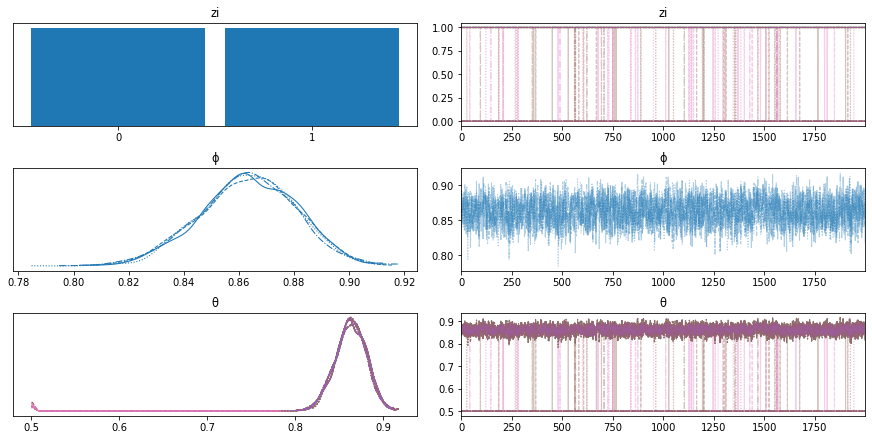

In [74]:
az.plot_trace(trace_Rønnn)

In [76]:
az.summary(trace_Rønnn)

c:\users\95\anaconda3\envs\cogmod\lib\site-packages\arviz\data\io_pymc3.py:88: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
c:\users\95\anaconda3\envs\cogmod\lib\site-packages\arviz\stats\diagnostics.py:642: RuntimeWarning: invalid value encountered in double_scalars
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
c:\users\95\anaconda3\envs\cogmod\lib\site-packages\arviz\stats\diagnostics.py:642: RuntimeWarning: invalid value encountered in double_scalars
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
c:\users\95\anaconda3\envs\cogmod\lib\site-packages\arviz\stats\diagnostics.py:642: RuntimeWarning: invalid value encountered in double_scalars
  (between_chain_variance / within_chain_variance + num_sam